# 11. Filtering

Filtering images is at the core of image processing. The idea is to use a small image that travels across a larger image and does some operation on each sub-region of this larger image.

Filters can be applied to regular images, as well as to masks (binary images) and are often used to clean-up an image or to detect object.

Scikit-image implements most of these filters in ```skimage.filters``` and ```skimage.morphology``` and we are going to look at a few.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import skimage
import skimage.io
import skimage.morphology

## 11.1 Linear filters

### 11.1.1 Blurring effect

Linear filters work by convoluting an image with a smaller template. That small template can be anything, but commonly it is a well-defined small matrix. For example it can be a 2D Gaussian. We can have a look at its actual shape by filtering an image that has a single pixel ON:

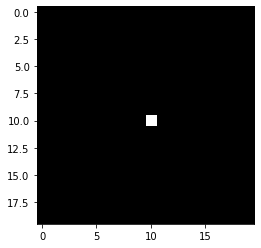

In [ ]:
single_dot = np.zeros((20,20))
single_dot[10,10] = 1
plt.imshow(single_dot, cmap = 'gray');

The Gaussian has default values and we can simply apply it on an image:

In [ ]:
filtered = skimage.filters.gaussian(single_dot)

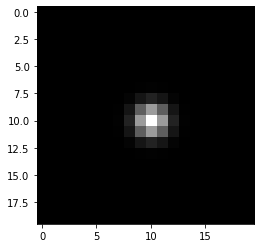

In [ ]:
plt.imshow(filtered, cmap = 'gray');

We can just plot a cross section to better understand what happened:

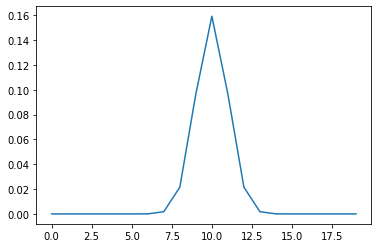

In [ ]:
plt.plot(filtered[10,:]);

The effect of this filtering was to "widen" the original single pixel, which is now spread out across the image. We can now also specify the width of the gaussian:

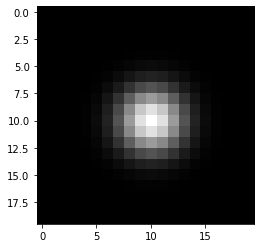

In [ ]:
filtered = skimage.filters.gaussian(single_dot,sigma=2)
plt.imshow(filtered, cmap = 'gray');

The Gaussian has become even wider. Let's put two dots on our image and see what happens:

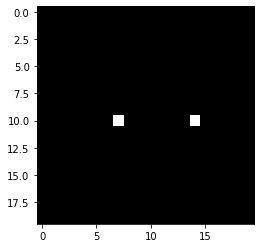

In [ ]:
double_dot = np.zeros((20,20))
double_dot[10,7] = 1
double_dot[10,14] = 1
plt.imshow(double_dot, cmap = 'gray');

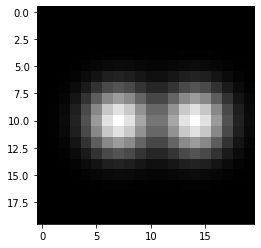

In [ ]:
filtered = skimage.filters.gaussian(double_dot,sigma=2)
plt.imshow(filtered, cmap = 'gray');

The end effect is to blur our image. If we apply our filter twice we get an even blurrier image:

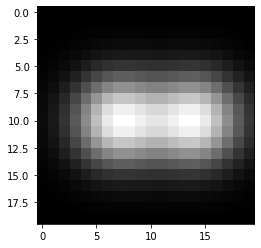

In [ ]:
filtered2 = skimage.filters.gaussian(filtered,sigma=2)
plt.imshow(filtered2, cmap = 'gray');

### 11.1.2 Removing noise

Gaussian filtering does not only blur information, it also helps removing noise. Let's for example take again our blurred image and add some noise to it. For that we use the numpy random module:

In [ ]:
noisy = filtered + 0.02*np.random.rand(20,20)

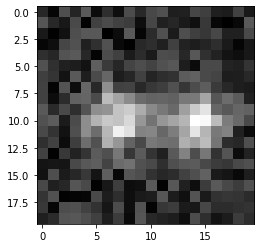

In [ ]:
plt.imshow(noisy, cmap = 'gray');

If we now apply again our gaussian filter:

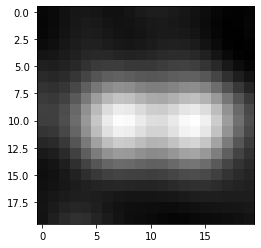

In [ ]:
noise_filtered = skimage.filters.gaussian(noisy,sigma=2)
plt.imshow(noise_filtered, cmap = 'gray');

We obtain an image which of course is blurred, but where the strong noise has mostly disappeared.

### 11.1.3 Filtering an image

We have been toying here with singe pixel images, but of course the goal is to apply such a filter to an actual image. Let's import one and adjust the width of our gaussian to see it's effect on a real image:

In [ ]:
image_stack = skimage.io.imread('https://cildata.crbs.ucsd.edu/media/images/13585/13585.tif')
#image_stack = skimage.io.imread('../Data/myoblast.tif')
image_nuclei = image_stack[0:100,0:100,2]

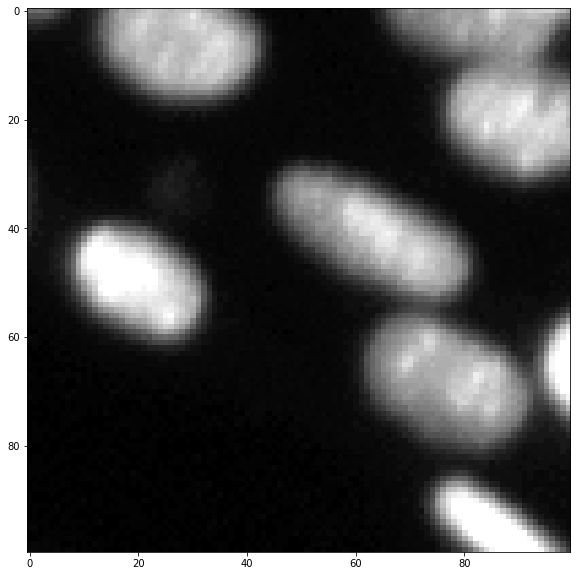

In [ ]:
plt.subplots(figsize=(10,10))
plt.imshow(image_nuclei, cmap = 'gray');

In [ ]:
filtered_image = skimage.filters.gaussian(image_nuclei)

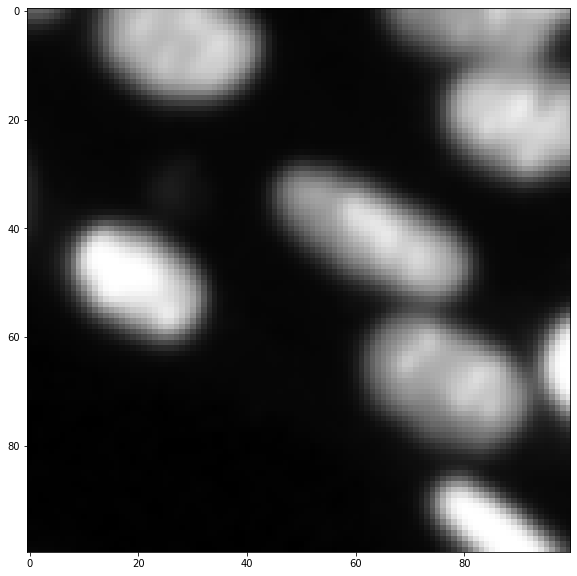

In [ ]:
plt.subplots(figsize=(10,10))
plt.imshow(filtered_image, cmap = 'gray');

In [ ]:
filtered_image = skimage.filters.gaussian(image_nuclei, sigma = 5)

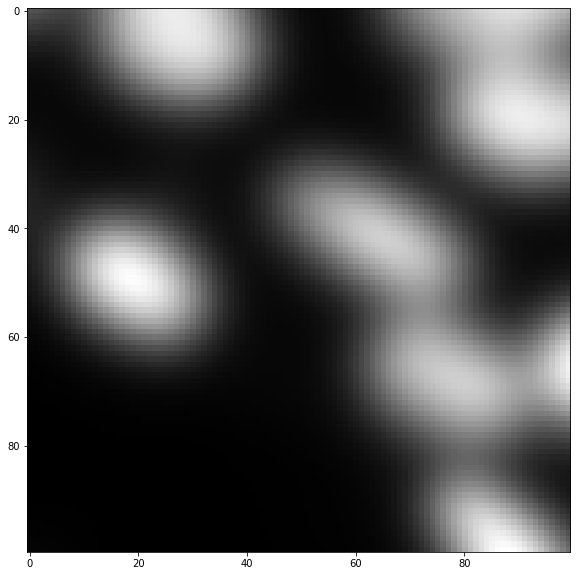

In [ ]:
plt.subplots(figsize=(10,10))
plt.imshow(filtered_image, cmap = 'gray');

Image filtering is of course a **vast** topic, and you should read more about it if you need it in your work. This example just illustrates how to use filters in Python using scikit-image.

## 11.2 Non-linear filters

Another class of filters does not use convolution to filter the image but does some other type of operation on small neighborhoods of the image. For example it can calculate the median value of each 3x3 sub-region in the image. This is extremely useful if our image has pixels that are "dead" or have extremely large values.

For purpose of illustration, we can artificially create such an image using a skimage utility:

In [ ]:
image_noisy = skimage.util.random_noise(image_nuclei, mode='s&p')

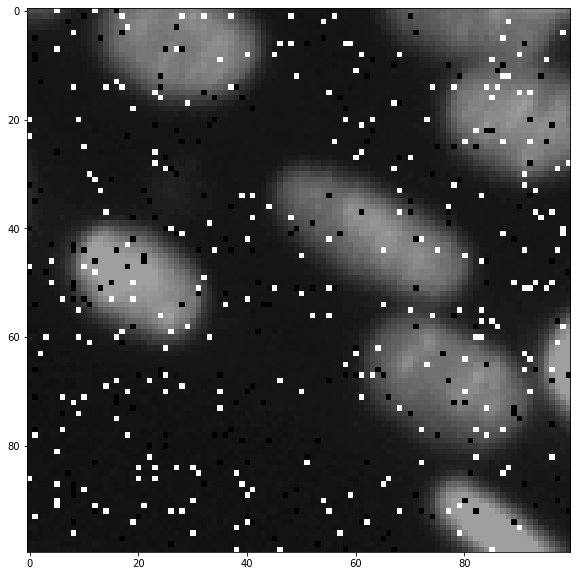

In [ ]:
plt.subplots(figsize=(10,10))
plt.imshow(image_noisy, cmap = 'gray');

If we apply a median filter of size 3x3, pixels which are completely out of range are going to be replaced by the median value of their surroundings. The others, will be mildly affected:

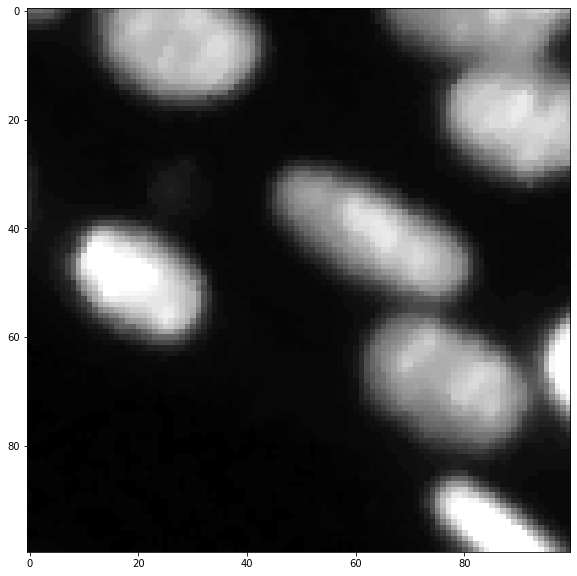

In [ ]:
filtered_median = skimage.filters.median(image_noisy)

plt.subplots(figsize=(10,10))
plt.imshow(filtered_median, cmap = 'gray')

This is a complete success!

## 11.3 Morphological filters

When working with masks, one can use another class of filters, that just turn pixels ON and OFF depending on their surroundings. The simplest to understand are the erosion and dilation filters. As their name indicate, these filters either shrink or enlarge ON objects. The size and shape of the filters, specify what region is considered around objects to shrink or enlarge them. These filters are here called structuring elements or ```selem```.

Let's create a simple masks using an Otsu threshold:

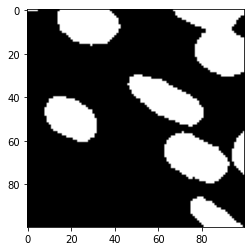

In [ ]:
mask = image_nuclei > skimage.filters.threshold_otsu(image_nuclei)

plt.imshow(mask, cmap = 'gray');

We can just specify the influence region as a Numpy array. For example a square of size 3:

In [ ]:
influence_region = np.ones((3,3))

In [ ]:
eroded = skimage.morphology.erosion(mask, selem=influence_region)

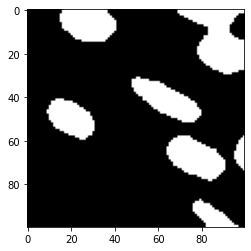

In [ ]:
plt.imshow(eroded, cmap = 'gray');

We can erode even more:

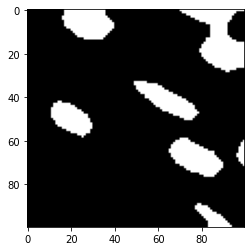

In [ ]:
influence_region = np.ones((5,5))

eroded = skimage.morphology.erosion(mask, selem=influence_region)

plt.imshow(eroded, cmap = 'gray');

We can do the reseverse an dilate our image:

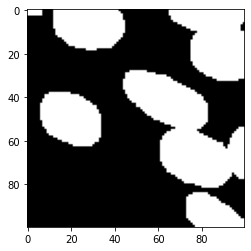

In [ ]:
influence_region = np.ones((5,5))

dilated = skimage.morphology.dilation(mask, selem=influence_region)

plt.imshow(dilated, cmap = 'gray');

How are these operators useful in image processing ? Let's again imagine that we have a noisy image. Our mask would look like this:

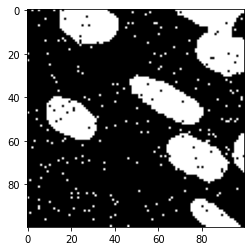

In [ ]:
mask = image_noisy > skimage.filters.threshold_otsu(image_noisy)

plt.imshow(mask, cmap = 'gray');

We can now fill the little holes in the nuclei with a small dilation:

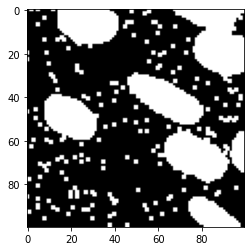

In [ ]:
influence_region = np.ones((2,2))

step1 = skimage.morphology.dilation(mask, selem=influence_region)

plt.imshow(step1, cmap = 'gray');

And erode again to put the nuclei back to their original size:

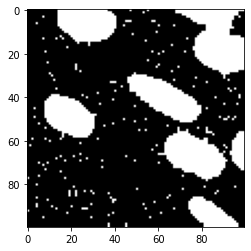

In [ ]:
influence_region = np.ones((2,2))

step2 = skimage.morphology.erosion(step1, selem=influence_region)

plt.imshow(step2, cmap = 'gray');

We still have some noise. So we can do another round where we first erode the image (to remove dust) and dilage it again to recover nuclei of correct size:

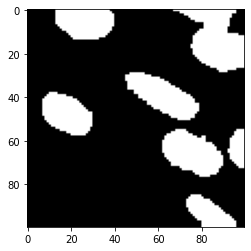

In [ ]:
influence_region = np.ones((2,2))

step3 = skimage.morphology.erosion(step2, selem=influence_region)
step4 = skimage.morphology.dilation(step3, selem=influence_region)

plt.imshow(step4, cmap = 'gray');

The combination of erosion and dilation is defined as specific operators (opening, closing) and are widely used.

Other morphological operators exist. For example one can shrink as much as possible all the structures of the image using the ```skeletonize``` function:


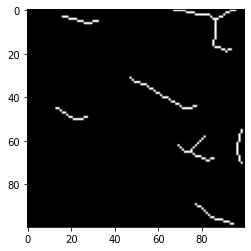

In [ ]:
skeleton = skimage.morphology.skeletonize(step4)

plt.imshow(skeleton, cmap = 'gray');